In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

In [3]:
data = pd.read_csv('../data/data.csv')

/Users/aniketchaudhary/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
pd.options.display.max_columns=50

In [5]:
#####################explore the data - descriptive statistics#####################

In [6]:
data.head()

,ID,State,Region,Division,Group_Name,MSA_Population_Size,GENDER_CODE,PRESUMED_DEAD_FLAG,Primary_TOP,Primary_PE,Primary_AD,Secondary,RX_Restriction_Indicator,customer_id,ID2,MyProd1_Rx,MyProd2_Rx,CompProd1_Rx,CompProd2_Rx,CompProd3_Rx,Age,TOP,PE,SPECIAlITY,YrsPractice,Ignore1,Ignore2,Ignore3,Ignore4,Ignore5,Ignore6
0,10259059.0,AL,3.0,6.0,1.0,1.0,1.0,NaN,20.0,30.0,FM,GS,NaN,326,326,0.0,0.282792,11.4531,17.9303,4.8554,89.0,20,30,FM,57.0,0.0,0.282792,11.4531,17.9303,4.8554,0.282792
1,10261004.0,AL,3.0,6.0,6.0,3.0,1.0,NaN,20.0,30.0,IM,HEM,NaN,355,355,0.0,0.000000,16.8683,20.1757,2.3040,80.0,20,30,IM,55.0,0.0,0.000000,16.8683,20.1757,2.3040,0.000000
2,10263002.0,TN,3.0,6.0,1.0,1.0,1.0,NaN,71.0,11.0,EM,PS,NaN,412,412,0.0,0.000000,25.6941,6.0275,0.0000,78.0,71,11,Other,53.0,0.0,0.000000,25.6941,6.0275,0.0000,0.000000
3,10265022.0,AL,3.0,6.0,1.0,1.0,1.0,NaN,20.0,30.0,FM,US,NaN,479,479,0.0,0.000000,20.6320,5.6000,2.9553,78.0,20,30,FM,51.0,0.0,0.000000,20.6320,5.6000,2.9553,0.000000
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,486,486,0.0,0.000000,35.0081,8.4561,0.0000,NaN,0,0,Other,NaN,0.0,0.000000,35.0081,8.4561,0.0000,0.000000


In [7]:
data.dtypes

ID                          float64
State                        object
Region                      float64
Division                    float64
Group_Name                  float64
MSA_Population_Size         float64
GENDER_CODE                 float64
PRESUMED_DEAD_FLAG           object
Primary_TOP                 float64
Primary_PE                  float64
Primary_AD                   object
Secondary                    object
RX_Restriction_Indicator     object
customer_id                   int64
ID2                           int64
MyProd1_Rx                  float64
MyProd2_Rx                  float64
CompProd1_Rx                float64
CompProd2_Rx                float64
CompProd3_Rx                float64
Age                         float64
TOP                           int64
PE                            int64
SPECIAlITY                   object
YrsPractice                 float64
Ignore1                     float64
Ignore2                     float64
Ignore3                     

In [8]:
# unique counts
def unique_counts(data):
    for i in data.columns:
        count = data[i].nunique()
        print(i, ": ", count)

In [9]:
unique_counts(data)

ID :  34898
State :  54
Region :  5
Division :  10
Group_Name :  4
MSA_Population_Size :  4
GENDER_CODE :  2
PRESUMED_DEAD_FLAG :  1
Primary_TOP :  11
Primary_PE :  18
Primary_AD :  131
Secondary :  147
RX_Restriction_Indicator :  1
customer_id :  77247
ID2 :  77245
MyProd1_Rx :  1440
MyProd2_Rx :  1725
CompProd1_Rx :  59225
CompProd2_Rx :  59647
CompProd3_Rx :  37811
Age :  65
TOP :  3
PE :  3
SPECIAlITY :  3
YrsPractice :  66
Ignore1 :  1440
Ignore2 :  1725
Ignore3 :  59225
Ignore4 :  59647
Ignore5 :  37811
Ignore6 :  2889


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b1e3c88>,
      dtype=object)

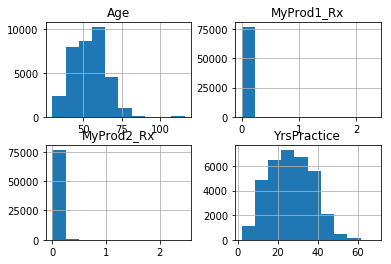

In [10]:
data[['MyProd1_Rx','MyProd2_Rx','Age','YrsPractice']].hist()

In [11]:
#####################explore the data - validate data##################################

In [12]:
#Region,Division,MSA_Poupulation_size,PRIMARY_TOP,PRIMARY_PE,MyProd1_Rx,MyProd2_Rx ,Age, YrsPractice need to be > 0

In [13]:
validate_features = [
    'Region', 'Division', 'MSA_Population_Size', 'Primary_TOP', 'Primary_PE',
    'MyProd1_Rx', 'MyProd2_Rx', 'Age', 'YrsPractice'
]

In [14]:
data[validate_features].min()

Region                  0.0
Division                0.0
MSA_Population_Size     1.0
Primary_TOP            12.0
Primary_PE             11.0
MyProd1_Rx              0.0
MyProd2_Rx              0.0
Age                    30.0
YrsPractice             2.0
dtype: float64

In [15]:
#Gender values should be exactly 2--1:Male,2:Female

In [16]:
data['GENDER_CODE'].unique()

array([ 1., nan,  2.])

In [17]:
print("-------Percentage of Null values count------")
for feature in data.columns.values:
    print(feature,"-->",100*data[feature].isnull().sum()/len(data))

-------Percentage of Null values count------
ID --> 54.72057167268632
State --> 54.73092806193121
Region --> 54.725749867308764
Division --> 54.725749867308764
Group_Name --> 54.72057167268632
MSA_Population_Size --> 54.72057167268632
GENDER_CODE --> 54.756819035043435
PRESUMED_DEAD_FLAG --> 99.99741090268878
Primary_TOP --> 54.72057167268632
Primary_PE --> 54.72057167268632
Primary_AD --> 54.72057167268632
Secondary --> 54.72057167268632
RX_Restriction_Indicator --> 97.24520046085932
customer_id --> 0.0
ID2 --> 0.0
MyProd1_Rx --> 0.0
MyProd2_Rx --> 0.0
CompProd1_Rx --> 0.0
CompProd2_Rx --> 0.0
CompProd3_Rx --> 0.0
Age --> 54.72057167268632
TOP --> 0.0
PE --> 0.0
SPECIAlITY --> 0.0
YrsPractice --> 54.72057167268632
Ignore1 --> 0.0
Ignore2 --> 0.0
Ignore3 --> 0.0
Ignore4 --> 0.0
Ignore5 --> 0.0
Ignore6 --> 0.0


In [18]:
##here we can see that for 'RX Restriction indicator"  97% values are null..its better to remove this column for our
#feature set
data = data.drop('RX_Restriction_Indicator',axis=1)

In [19]:
#####################explore the data - create new variables that might be useufl###########

In [20]:
#since we are interested in find out HCP which are selling either product 1 or product 1 or both,
#so we can add these prescription to consider one feature only.

In [21]:
data['Rx'] = data['MyProd1_Rx'] + data['MyProd2_Rx']

In [22]:
#now we can remove myprod1_rx and myprod2_rx
data = data.drop(['MyProd1_Rx','MyProd2_Rx'],axis=1)

In [23]:
############## clustering ##############

In [24]:
# Step 1: what are the features I am going to use (that make sense)?
# What features may distinguish? based on business sense and exploratory analysis

In [25]:
features = [
    'State', 'Region', 'Division', 'GENDER_CODE', 'Primary_TOP', 'Primary_PE',
    'Primary_AD', 'Secondary', 'SPECIAlITY', 'Age', 'YrsPractice', 'Rx'
]

In [26]:
data = data[['customer_id']+features]

In [27]:
# Drop the columns where all elements are nan:
# data.dropna(axis=1, how='all',inplace=True)

In [28]:
#Drop the row and columns where all elements are nan:

In [29]:
hvd_data = data.dropna(axis=0)[['customer_id'] + features]

In [30]:
## 0 Rx prescribed docotors will taken in separate cluster in the end
hvd_data = hvd_data[hvd_data['Rx']>0].sort_values('Rx')

In [31]:
hvd_data['State'].unique()

array(['IL', 'VA', 'GA', 'TN', 'KY', 'AL', 'AR', 'PA', 'FL', 'TX', 'WV',
       'NJ', 'MS', 'MD', 'NV', 'CA', 'NC', 'OH', 'NY', 'MO', 'NE', 'SC',
       'OK', 'LA', 'CT', 'CO', 'WA', 'UT', 'AZ', 'IN', 'NM', 'DE', 'WI',
       'MI', 'KS', 'HI', 'RI', 'IA', 'OR', 'ID', 'MA', 'DC', 'AK', 'SD',
       'MN', 'WY'], dtype=object)

In [32]:
# Step 2: shall I standardise the data?
# What is the magnitude of data range?
# Only numerical variables needs to be scaled because catagorical variable cannot be scaled

In [33]:
num_features = ['Primary_TOP', 'Primary_PE','Age', 'YrsPractice']
hvd_std = hvd_data.copy()
for i in num_features:
#     hvd_std[i] = preprocessing.RobustScaler().fit_transform(hvd_std[[i]])
    hvd_std[i] = preprocessing.StandardScaler().fit_transform(hvd_std[[i]])

In [35]:
# Step 3: select clustering method and number of clusters
# K-means?? Ans: no
##Since our data is of mixed type..means it have both catogorical and numerical features therefore we cannot use k-means
# K-Prototype can used becuase it can take care of both kinds of variables.
from kmodes.kprototypes import KPrototypes
from matplotlib import style
style.use("ggplot")

In [36]:
X = hvd_std[hvd_std.columns.values[1:]].values

hvd_std['Region'] = hvd_std['Region'].astype('str')
hvd_std['Division'] = hvd_std['Division'].astype('str')
hvd_std['GENDER_CODE'] = hvd_std['GENDER_CODE'].astype('str')

In [37]:
hvd_std.dtypes

customer_id      int64
State           object
Region          object
Division        object
GENDER_CODE     object
Primary_TOP    float64
Primary_PE     float64
Primary_AD      object
Secondary       object
SPECIAlITY      object
Age            float64
YrsPractice    float64
Rx             float64
dtype: object

In [38]:
kproto = KPrototypes(n_clusters=3, init='Cao')

#here in our alogrithim we have to specify which all columns are catogrical.
clusters = kproto.fit_predict(X, categorical=[0,1,2,3,6,7,8])

In [828]:
hvd_std['Cluster'] = kproto.labels_

In [829]:
#Step 4: Dimensionality Reduction ###
#Now we want to visualize the data from n diminesiton to 2 dimesion so we have to reduce the dimensionality of the
#data..since our data has both categorical and numerical values so we have to use "facotor analysis for mixed data" technique 
#"Prince" package has this implementation
import prince

In [830]:
pca = prince.PCA(hvd_std[features], n_components=2)


pca_components = pca.row_principal_coordinates.rename(columns={0:'Component 1',1:'Component 2'})

hvd_std['Component_1'] = pca_components['Component 1'].values
hvd_std['Component_2'] = pca_components['Component 2'].values

/home/aniketchaudhary/anaconda3/lib/python3.5/site-packages/prince/pca.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dataframe.drop(supplementary_row_names, axis='rows', inplace=True)
/home/aniketchaudhary/anaconda3/lib/python3.5/site-packages/prince/pca.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dataframe.drop(supplementary_column_names, axis='columns', inplace=True)
/home/aniketchaudhary/anaconda3/lib/python3.5/site-packages/prince/pca.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

Text(0.5,1,'Dimensionality Reduction')

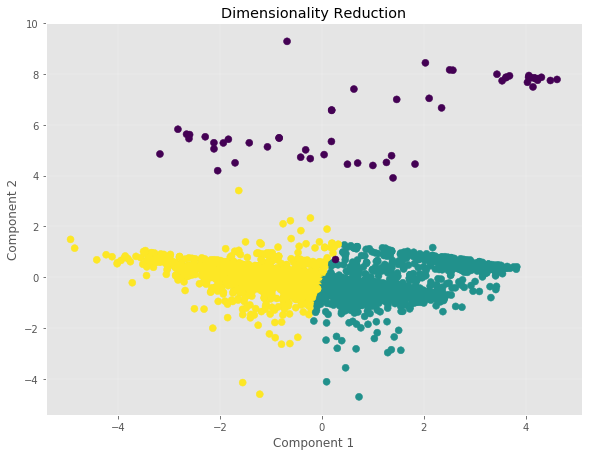

In [831]:
plt.scatter(hvd_std['Component_1'],hvd_std['Component_2'],c=hvd_std['Cluster'])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Dimensionality Reduction')

In [832]:
# Step 5: profile the clusters
hvd_std.groupby('Cluster')['Rx'].mean().reset_index()

,Cluster,Rx
0,0,0.178888
1,1,0.183536
2,2,0.193880


In [833]:
#to maximize lisa's returns the customers can be grouped via Rx average value
####Cluster 2 is for Super High 
####Cluster 1 is for High
####Cluster 0 is for Medium

##before feeding the data to K-prototype we separated data into Rx>0 and  Rx=0.
##customers who have prescribed Rx as 0 can be made as Cluster which is 'Low'